In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.append('/opt/ml/code/src/')

from features import feature_engineering
from utils import plot_feature_importances

In [2]:
# 데이터 파일 읽기
df = pd.read_csv('/opt/ml/code/input/train.csv', parse_dates=['order_date'])

# 예측할 연월 설정
year_month = '2011-12'

# feature_engineering1(df, year_month)
train_set, test_set, train_set['label'], features = feature_engineering(df, year_month)

categorical feature: ['year_month-mode']
train_set.shape (5722, 121) , test_set.shape (5914, 121)


# feature 확인하기 
### label을 다른 기준으로 분류하는지 확인

In [3]:
train_set.head()

,customer_id,year_month,label,quantity-mean,quantity-max,quantity-min,quantity-sum,quantity-count,quantity-std,quantity-skew,...,price_diff-skew,total_diff-mean,total_diff-max,total_diff-min,total_diff-sum,total_diff-count,total_diff-std,total_diff-skew,month-mode,year_month-mode
0,12346,2011-11,0,1.127660,74215.0,-74215.0,53.0,47.0,15474.897433,-0.000228,...,-0.840908,-2770.156304,127360.365,-254705.880,-127427.1900,46.0,42359.030338,-4.214047,6.0,6.0
1,12347,2011-11,0,13.151659,240.0,2.0,2775.0,211.0,17.701647,10.216574,...,0.840331,-0.047143,382.635,-387.090,-9.9000,210.0,48.115335,0.041801,10.0,22.0
2,12348,2011-11,0,53.215686,144.0,1.0,2714.0,51.0,48.700848,0.822147,...,0.251831,0.884400,312.840,-327.096,44.2200,50.0,83.855397,-0.069972,9.0,9.0
3,12349,2011-11,1,9.233645,48.0,-1.0,988.0,107.0,8.408867,1.558634,...,-0.213999,0.315212,386.265,-395.670,33.4125,106.0,75.363508,-0.089535,10.0,10.0
4,12350,2011-11,0,11.588235,24.0,1.0,197.0,17.0,4.345383,0.472554,...,0.079587,0.000000,37.290,-27.555,0.0000,16.0,15.735384,0.404341,2.0,14.0


In [4]:
features

Index(['quantity-mean', 'quantity-max', 'quantity-min', 'quantity-sum',
       'quantity-count', 'quantity-std', 'quantity-skew', 'price-mean',
       'price-max', 'price-min',
       ...
       'price_diff-skew', 'total_diff-mean', 'total_diff-max',
       'total_diff-min', 'total_diff-sum', 'total_diff-count',
       'total_diff-std', 'total_diff-skew', 'month-mode', 'year_month-mode'],
      dtype='object', length=118)

# 내가 뭘 그린걸까?

In [5]:
num = len(features)

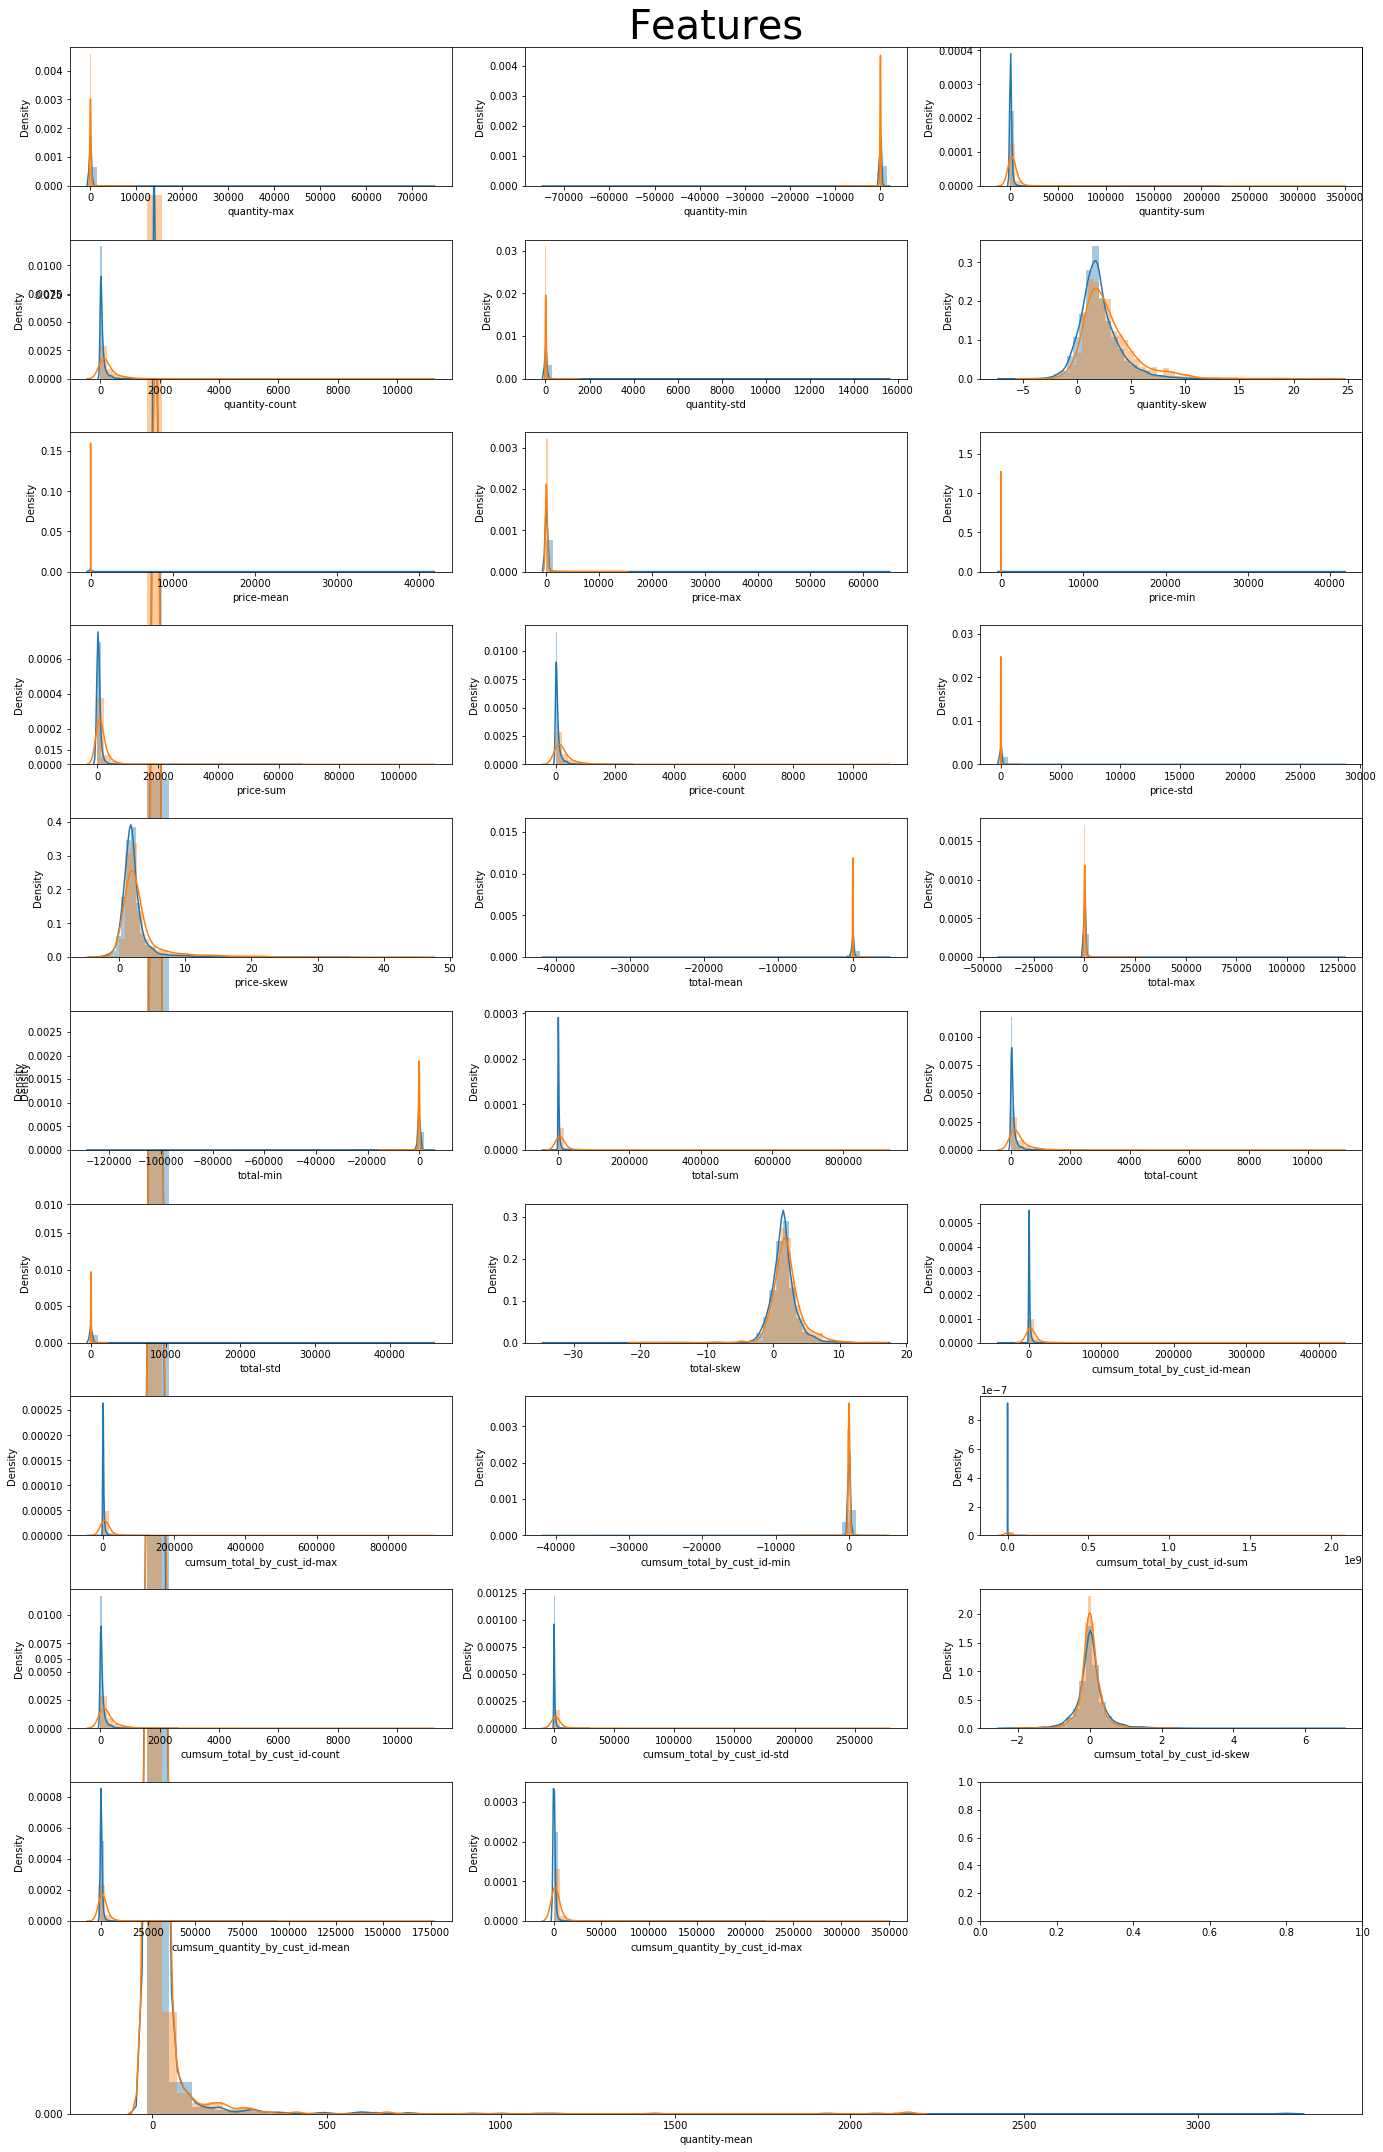

In [12]:
fig = plt.figure(figsize=(20, 30))
plt.title(f'Features', size = 40)
# plt.axis('off')
for i, feature in enumerate(features):
    sns.distplot(train_set.loc[train_set['label']==0, feature], label='label=0')
    sns.distplot(train_set.loc[train_set['label']==1, feature], label='label=1')

    ax = fig.add_subplot(30//3 + 1, 3, i+1)
    
    # for text in out.subset_labels:
    #     text.set_fontsize(25)
    # plt.title(f'{feature}', size = 15)
# plt.savefig('/opt/ml/code/notebook/picture/compare_year.png', dpi=200)
    fig.tight_layout()
    if i == 29:
        break

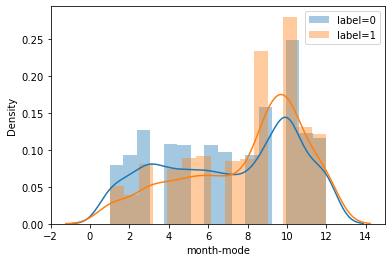

In [9]:
sample1 = train_set

sns.distplot(sample1.loc[sample1['label']==0, 'month-mode'], label='label=0')
sns.distplot(sample1.loc[sample1['label']==1, 'month-mode'], label='label=1')
plt.legend()
plt.show()

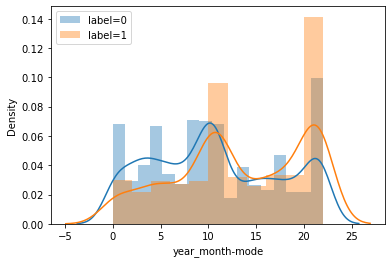

In [10]:
sns.distplot(sample1.loc[sample1['label']==0, 'year_month-mode'], label='label=0')
sns.distplot(sample1.loc[sample1['label']==1, 'year_month-mode'], label='label=1')
plt.legend()
plt.show()